In [42]:
#All the libralies used in this project

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("diamonds.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53940, 10)

Data cleaning
Identifying and removing outliers
Encoding categorical variables

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**Pairplot Of Data**

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

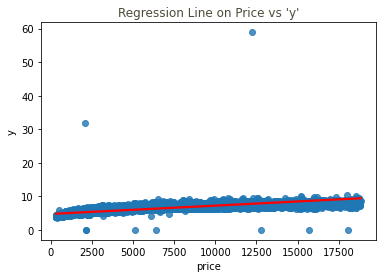

In [10]:
ax = sns.regplot(x="price", y="y", data=data, fit_reg=True,line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

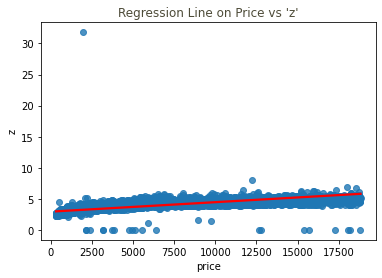

In [11]:
ax= sns.regplot(x="price", y="z", data=data, fit_reg=True, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs 'z'", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

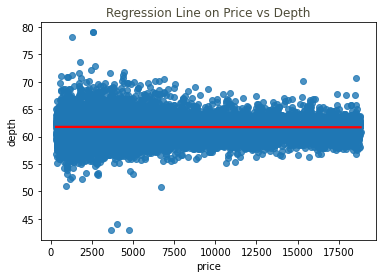

In [13]:
ax= sns.regplot(x="price", y="depth", data=data, fit_reg=True, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs Depth", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

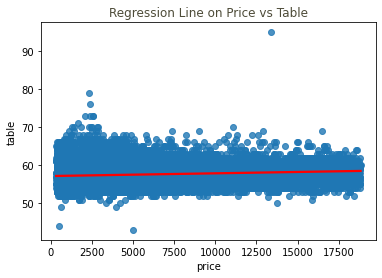

In [14]:
ax=sns.regplot(x="price", y="table", data=data, fit_reg=True, line_kws={"color": "red"})
ax.set_title("Regression Line on Price vs Table", color="#4e4c39")

removing outliers

In [4]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

categorical variables. 

In [5]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


Lable encoding 

In [6]:
# Make copy to avoid changing original data 
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)

In [24]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",MinMaxScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",MinMaxScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",MinMaxScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",MinMaxScaler()),
                     ("rf_classifier",KNeighborsRegressor())])



pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn]


pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [25]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="r2", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: 0.886069 
DecisionTree: 0.964824 
RandomForest: 0.981336 
KNeighbors: 0.970110 


**Testing the Model with Random forest**

In [26]:
# Model prediction on test data
pred = pipeline_rf.predict(X_test)

In [27]:
predt=pipeline_rf.predict(X_train)

In [28]:
print("R^2:",metrics.r2_score(y_train, predt))
print("MAE:",metrics.mean_absolute_error(y_train, predt))
print("MSE:",metrics.mean_squared_error(y_train, predt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, predt)))

R^2: 0.9973715767791287
MAE: 100.48718098992407
MSE: 42116.889025186305
RMSE: 205.22399719620097


In [29]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9806618601072657
MAE: 270.46706298195403
MSE: 297594.0858209575
RMSE: 545.5218472444137


Text(0, 0.5, 'predicted values')

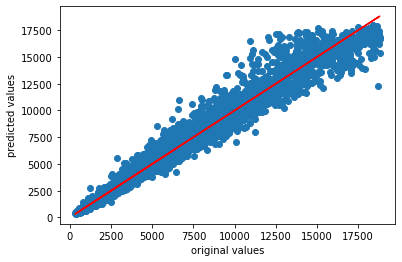

In [48]:
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')
plt.xlabel("original values")
plt.ylabel("predicted values")
